## **Example) Visualize Multi-input MNIST Activation Map (2/2)**
### *Load trained models and visualize activation map*

#### Initialize GPU memory

In [1]:
import keras
import tensorflow as tf
# GPU constraints
config = tf.ConfigProto()
config.gpu_options.allow_growth = True 
sess = tf.Session(config=config)
tf.keras.backend.set_session(sess)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### **1. Load pretrained models**

In [2]:
model_path = 'models/example01.h5'
model_x1_path = 'models/example01-1.h5'
model_x2_path = 'models/example01-2.h5'

In [3]:
model = keras.models.load_model(model_path)
model_x1 = keras.models.load_model(model_x1_path)
model_x2 = keras.models.load_model(model_x2_path)

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   4160        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 64)   4160        input_2[0][0]                    
__________________________________________________________________________________________________
activation

In [5]:
model_x1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4160      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
Total params: 4,160
Trainable params: 4,160
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_x2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        4160      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
Total params: 4,160
Trainable params: 4,160
Non-trainable params: 0
_________________________________________________________________


### **2. Load and preprocess MNIST dataset**

In [7]:
import numpy as np
from keras.datasets import mnist

num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_train = np.expand_dims(x_train, axis=-1)
x_test = x_test.astype(np.float32) / 255
x_test = np.expand_dims(x_test, axis=-1)

print("Original MNIST dataset shapes")
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from copy import deepcopy

def multi_input_mnist(X, Y):
    x1_indices = np.arange(len(X))
    np.random.shuffle(x1_indices)
    X1 = deepcopy(X[x1_indices])
    Y1 = deepcopy(Y[x1_indices])

    x2_indices = np.arange(len(X))
    np.random.shuffle(x2_indices)
    X2 = deepcopy(X[x2_indices])
    Y2 = deepcopy(Y[x2_indices])

    print(Y)

    Y = []
    for y1, y2 in zip(Y1, Y2):
        if y1 == y2:
            #print("y1 : {} / y2 : {}".format(y1, y2))
            Y.append([True])
        else:
            Y.append([False])

    Y = np.array(Y)

    print("Multi-input MNIST dataset shapes")
    print("x1 : {}".format(X1.shape))
    print("x2 : {}".format(X2.shape))
    print("y  : {}".format(Y.shape))
    print("number of positive : {}".format(np.sum(Y)))
    return X1, X2, Y


Original MNIST dataset shapes
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [9]:
# Generate Test Dataset
x_test, y_test = x_test[:1000], y_test[:1000]
x1_test, x2_test, y_test = multi_input_mnist(x_test, y_test)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 2 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 2 6 6 4 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 9 1
 9 7 5 4 0 8 9 9 1 0 5 2 

### **3. Test pre-trained model using Multi-Input MNIST**

In [10]:
p_test = model.predict([x1_test, x2_test])
print("- Prediction Test Data Shape : {}".format(p_test.shape))

- Prediction Test Data Shape : (1000, 1)


In [12]:
from sklearn.metrics import classification_report
p_test = p_test > 0.5
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       888
        True       0.94      0.86      0.90       112

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.98      0.98      0.98      1000



### **4. Visualize Activation Maps on Multi-Input MNIST**

In [15]:
# Sampling 5 Positive and 5 Negative set
def sampling(X1, X2, Y, size):
    pos_X1, pos_X2 = [], []
    neg_X1, neg_X2 = [], []
    for x1, x2, y in zip(X1, X2, Y):
        if y[0] == True: 
            pos_X1.append(x1)
            pos_X2.append(x2)
        else:
            neg_X1.append(x1)
            neg_X2.append(x2)
    
    # Convert Numpy Array for index slicing
    pos_X1, pos_X2 = np.array(pos_X1), np.array(pos_X2)
    neg_X1, neg_X2 = np.array(neg_X1), np.array(neg_X2)
    
    # Init index list
    pos_indices = np.arange(len(pos_X1))
    neg_indices = np.arange(len(neg_X1))
    
    # Shuffle index list
    np.random.shuffle(pos_indices)
    np.random.shuffle(neg_indices)
    
    # Shuffle two array with same order using shuffled index list
    pos_X1, pos_X2 = pos_X1[pos_indices], pos_X2[pos_indices]
    neg_X1, neg_X2 = neg_X1[neg_indices], neg_X2[neg_indices]
    
    # Sample target size
    pos_X1, pos_X2 = pos_X1[:size], pos_X2[:size]
    neg_X1, neg_X2 = neg_X1[:size], neg_X2[:size]
    
    return pos_X1, pos_X2, neg_X1, neg_X2

In [17]:
pos_x1, pos_x2, neg_x1, neg_x2 = sampling(x1_test, x2_test, y_test, size=5)
print("- Sampled Positive X1: {} / X2: {}".format(pos_x1.shape, pos_x2.shape))
print("- Sampled Negative X1: {} / X2: {}".format(neg_x1.shape, neg_x2.shape))

- Sampled Positive X1: (5, 28, 28, 1) / X2: (5, 28, 28, 1)
- Sampled Negative X1: (5, 28, 28, 1) / X2: (5, 28, 28, 1)


In [49]:
import matplotlib.pyplot as plt

# Ref - color map : https://matplotlib.org/examples/color/colormaps_reference.html

def plot_samples(X1, X2, tag):
    plt.figure(figsize=(20,8))
    for i, (x1, x2) in enumerate(zip(X1, X2)):
        print(i, x1[:,:,0].shape, x2.shape)
        
        plt.subplot(2,5,i+1)
        plt.title('{} {}-1'.format(tag,i+1))
        plt.imshow(x1[:,:,0], cmap='gray') # Channel 0

        plt.subplot(2,5,i+1+5)
        plt.title('{} {}-2'.format(tag,i+1))
        plt.imshow(x2[:,:,0], cmap='binary') # Channel 0
    plt.show()

0 (28, 28) (28, 28, 1)
1 (28, 28) (28, 28, 1)
2 (28, 28) (28, 28, 1)
3 (28, 28) (28, 28, 1)
4 (28, 28) (28, 28, 1)


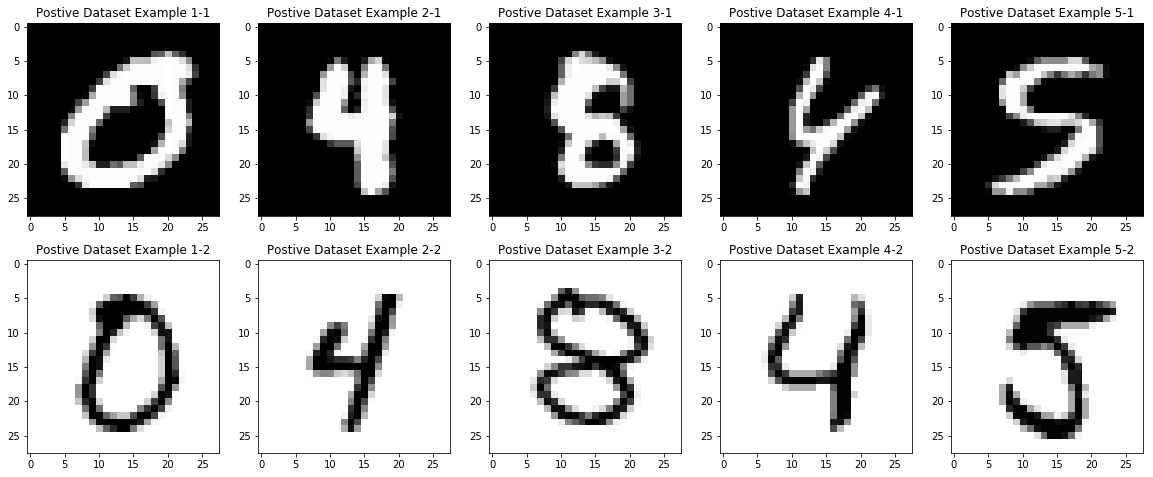

In [50]:
plot_samples(pos_x1, pos_x2, tag="Postive Dataset Example")

0 (28, 28) (28, 28, 1)
1 (28, 28) (28, 28, 1)
2 (28, 28) (28, 28, 1)
3 (28, 28) (28, 28, 1)
4 (28, 28) (28, 28, 1)


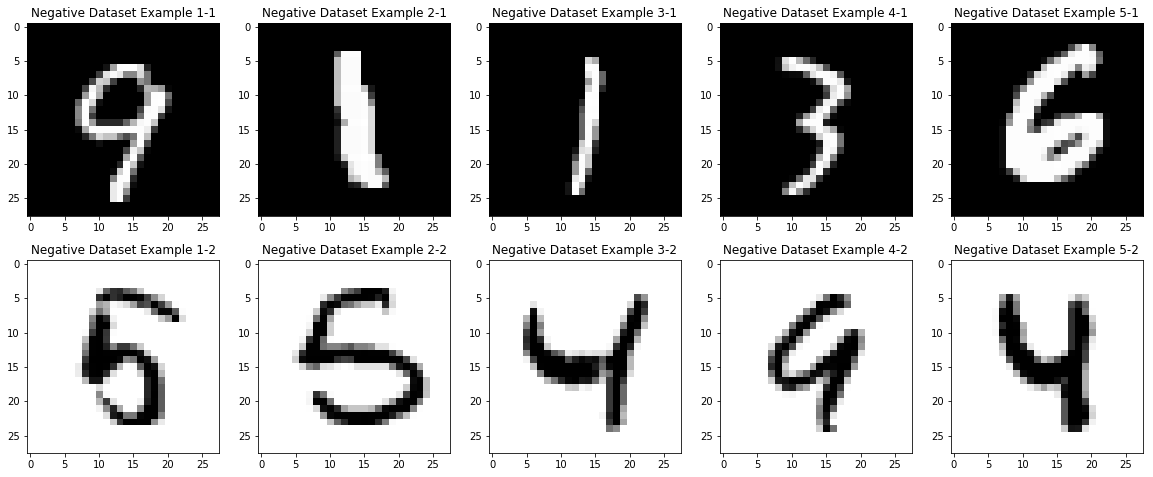

In [51]:
plot_samples(neg_x1, neg_x2, tag="Negative Dataset Example")

In [54]:
# Get Activation Maps
pos_x1_map = model_x1.predict(pos_x1)
pos_x2_map = model_x1.predict(pos_x2)
neg_x1_map = model_x2.predict(neg_x1)
neg_x2_map = model_x2.predict(neg_x2)

print("- Positive X1 Act-map : {} / X2 Act-map : {}".format(pos_x1_map.shape, pos_x2_map.shape))
print("- Negative X1 Act-map : {} / X2 Act-map : {}".format(neg_x1_map.shape, neg_x2_map.shape))

- Positive X1 Act-map : (5, 28, 28, 64) / X2 Act-map : (5, 28, 28, 64)
- Negative X1 Act-map : (5, 28, 28, 64) / X2 Act-map : (5, 28, 28, 64)


In [71]:
def plot_activiation_maps(X, tag, num_channels=64, cmap='gray'):
    plt.figure(figsize=(30,30))
    for i in range(num_channels):
        plt.subplot(8,8,i+1)
        plt.title('{} channel-{}'.format(tag,i+1))
        plt.imshow(X[:,:,i], cmap=cmap) 
    plt.show()

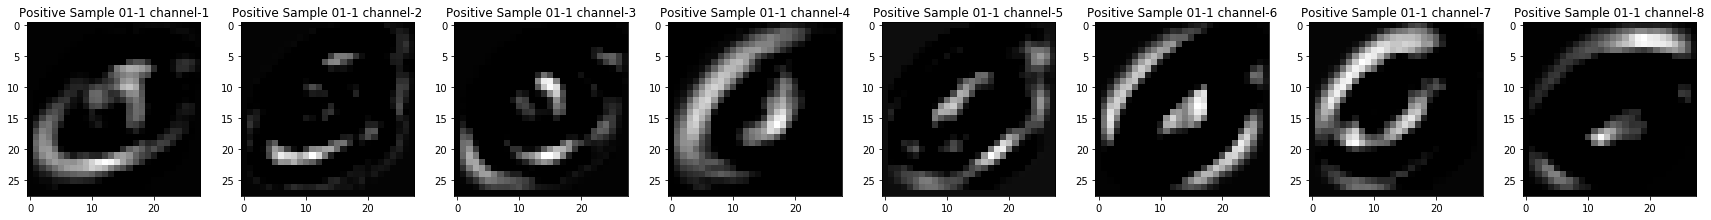

In [73]:
plot_activiation_maps(pos_x1_map[0], tag='Positive Sample 01-1', num_channels=8, cmap='gray')

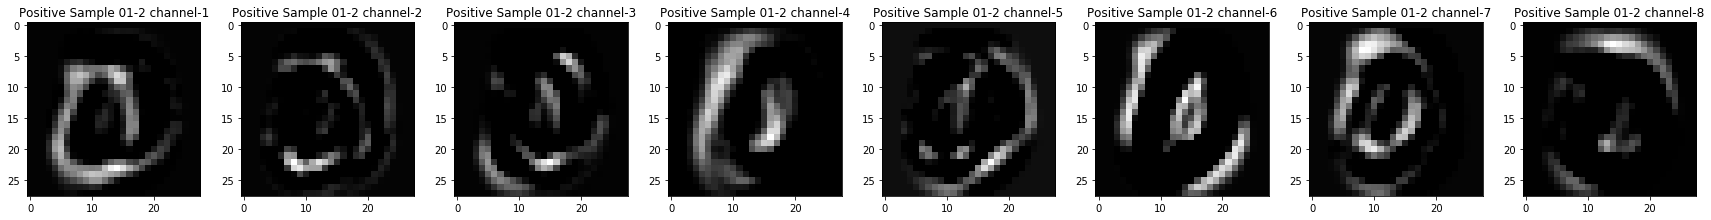

In [74]:
plot_activiation_maps(pos_x2_map[0], tag='Positive Sample 01-2', num_channels=8, cmap='gray')

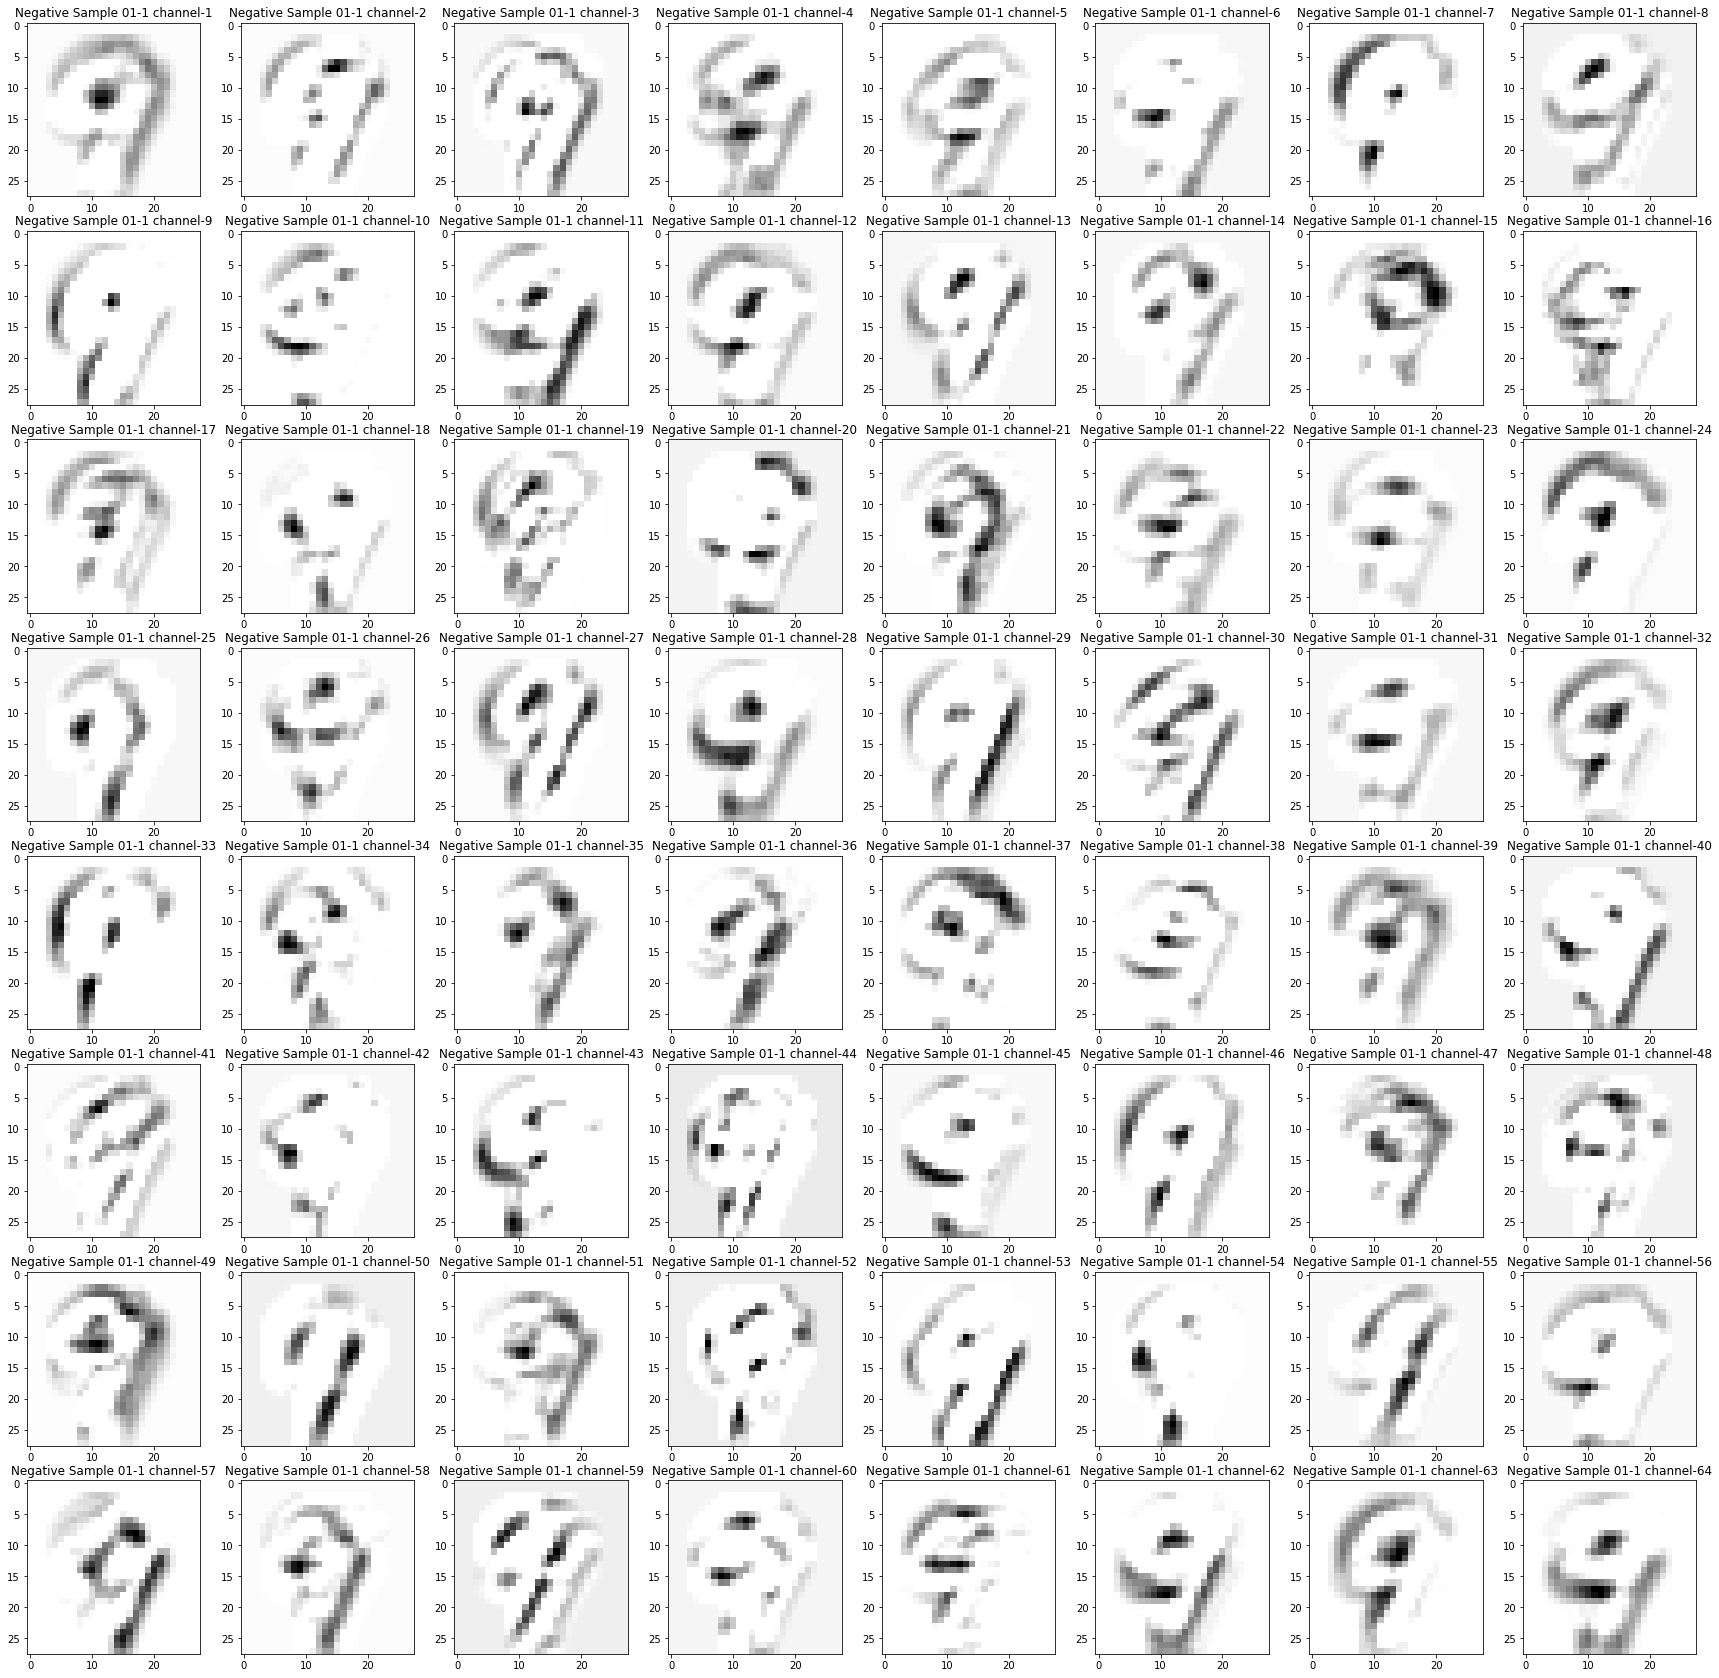

In [80]:
plot_activiation_maps(neg_x1_map[0], tag='Negative Sample 01-1', num_channels=64, cmap='binary')

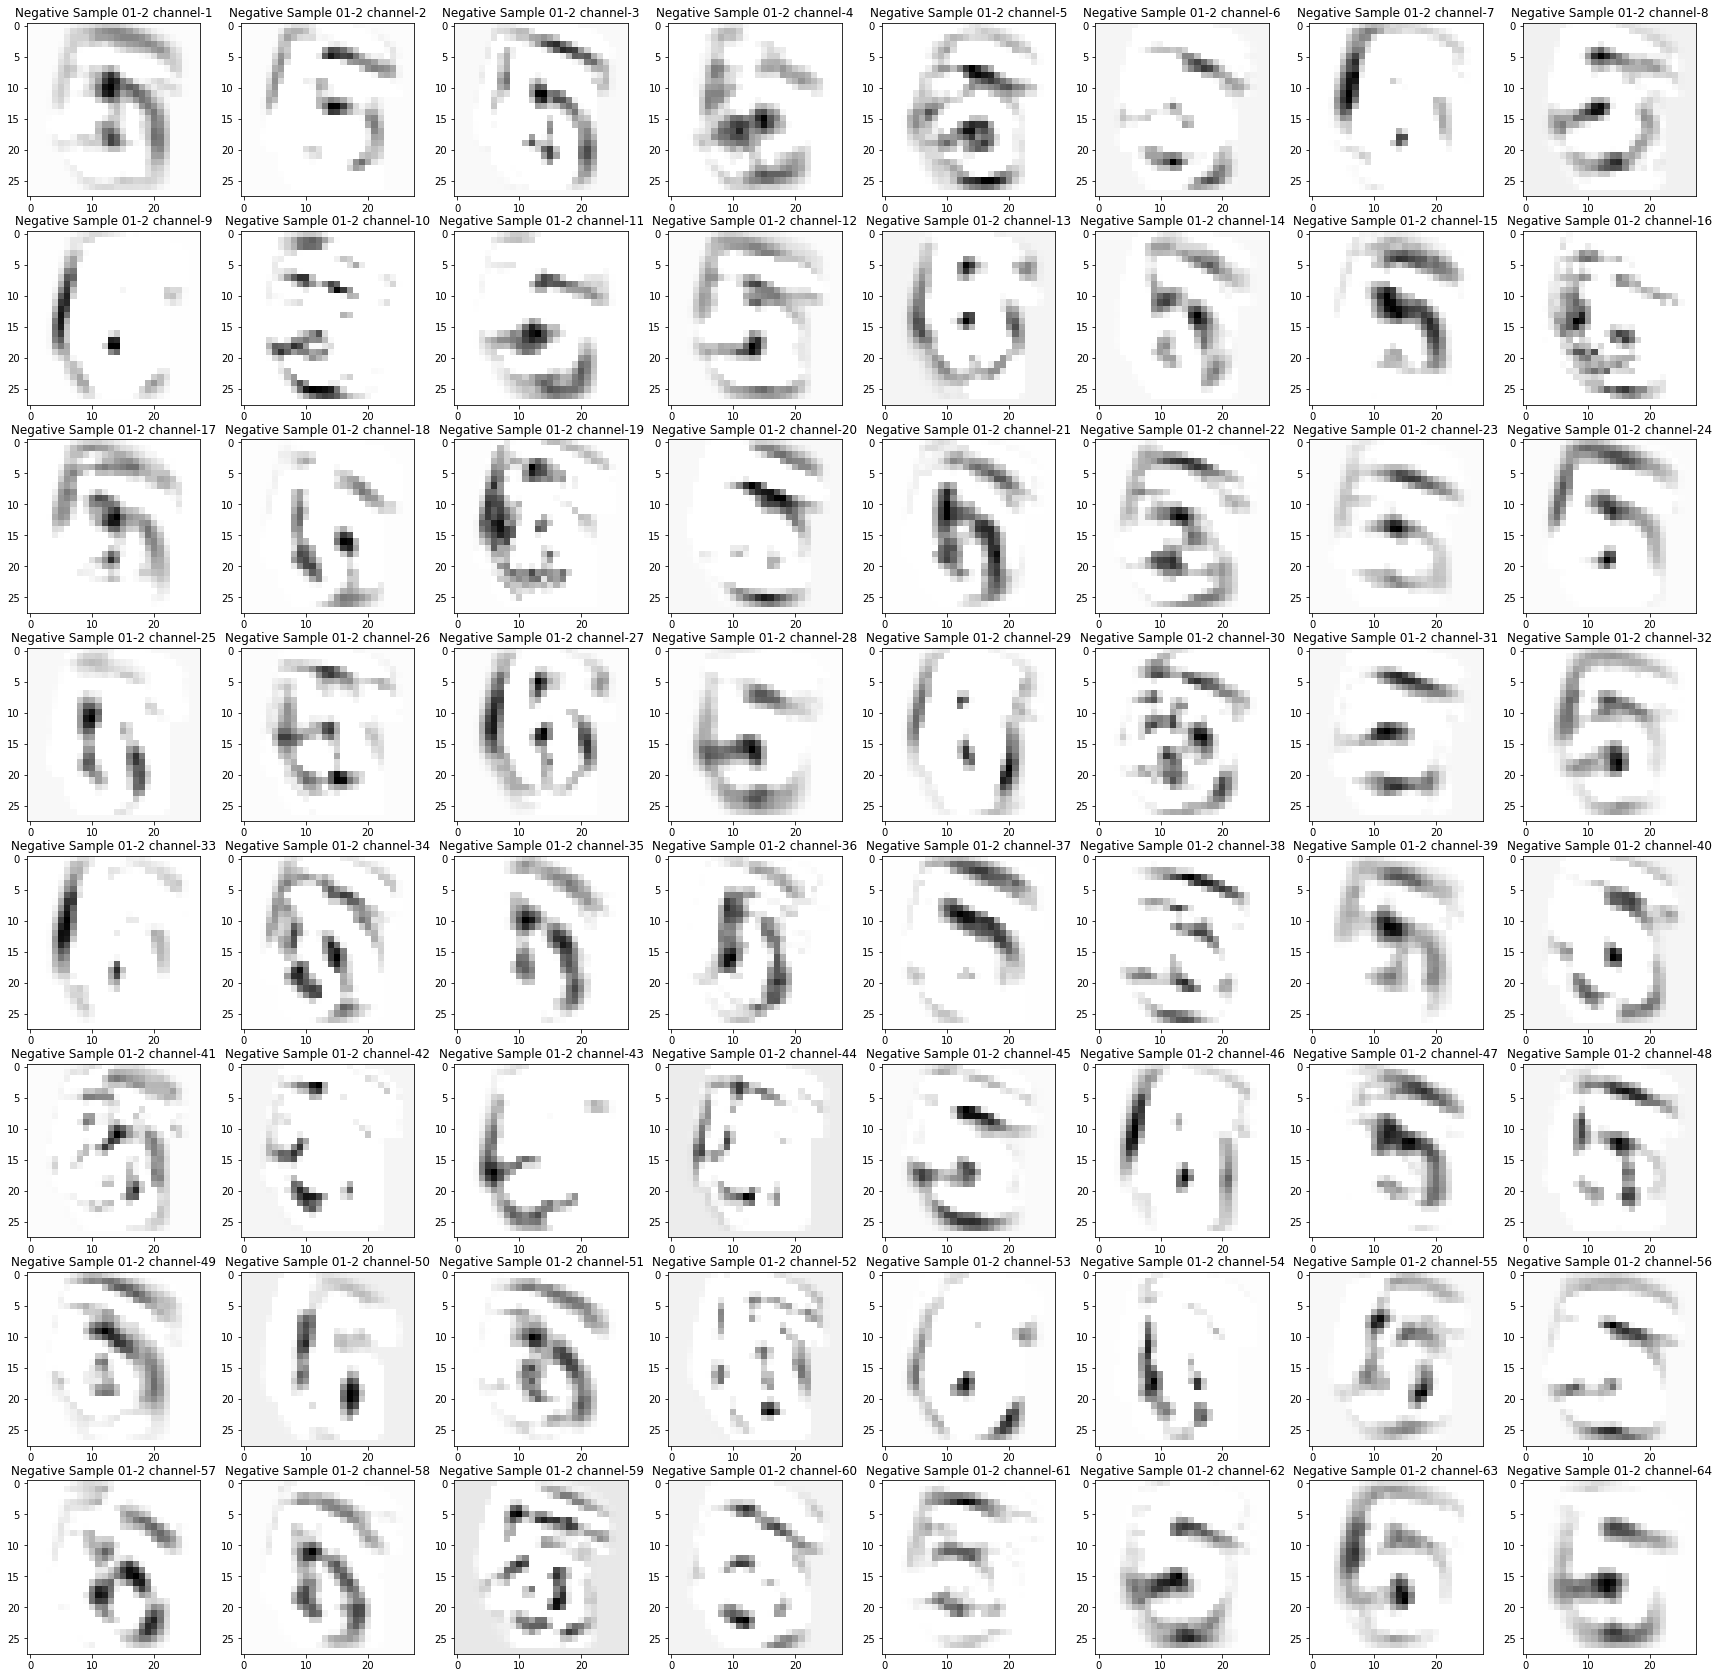

In [79]:
plot_activiation_maps(neg_x2_map[0], tag='Negative Sample 01-2', num_channels=64, cmap='binary')